In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
import datetime as dt
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession


In [ ]:
# from pyspark.sql import SparkSession

 # Create a SparkSession
spark = SparkSession.builder.appName("Csv Reader").getOrCreate()

 # Read the CSV files into DataFrames
df1 = spark.read.csv("/home/vishal/office/databricks/datasets/Combined_Generation_Weather_Data1.csv",
                  header=True, inferSchema=True)

df2 = spark.read.csv("/home/vishal/office/databricks/datasets/Combined_Generation_Weather_Data2.csv",
                  header=True, inferSchema=True)

 # Print the DataFrames
print("Data from Combined_Generation_Weather_Data1.csv")
df1.show()
print("\n\nData from Combined_Generation_Weather_Data2.csv")
df2.show()

df1_selected = df1.select("DATE_TIME", "PLANT_ID", "SOURCE_KEY", "DC_POWER", "AC_POWER", "DAILY_YIELD", "TOTAL_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE")
df2_selected = df2.select("DATE_TIME", "PLANT_ID", "SOURCE_KEY", "DC_POWER", "AC_POWER", "DAILY_YIELD", "TOTAL_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE")

# # Print the selected DataFrames
print("\n\nData from Combined_Generation_Weather_Data1.csv after selecting columns")
df1_selected.show()

print("\n\nData from Combined_Generation_Weather_Data2.csv after selecting columns")
df2_selected.show()

# Stop the SparkSession
spark.stop()

In [29]:
gen_1=pd.read_csv('/home/vishal/office/databricks/datasets/Plant_1_Generation_Data.csv')
print(gen_1)
gen_1 = gen_1.drop('PLANT_ID', axis=1)
weather_1= pd.read_csv('/home/vishal/office/databricks/datasets/Plant_1_Weather_Sensor_Data.csv')
#print(weather_1)
weather_1= weather_1.drop("PLANT_ID",axis=1)
#weather_1
# #format datetime
gen_1['DATE_TIME']= pd.to_datetime(gen_1['DATE_TIME'],format='%d-%m-%Y %H:%M')
weather_1['DATE_TIME']= pd.to_datetime(weather_1['DATE_TIME'],format='%Y-%m-%d %H:%M:%S')
print(gen_1)

              DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0      15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1      15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2      15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3      15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4      15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                 ...       ...              ...       ...       ...   
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
0            0.000    6259559.0  
1            0.000    6183645.0  
2        

In [ ]:
df_gen=gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen['time']=df_gen['DATE_TIME'].dt.time

df_gen.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy')
df_gen.set_title('Daily yield',)
df_gen.set_title('AC power & DC power during day hours')
df_gen.set_ylabel('kW',color='navy',fontsize=17)
plt.show()

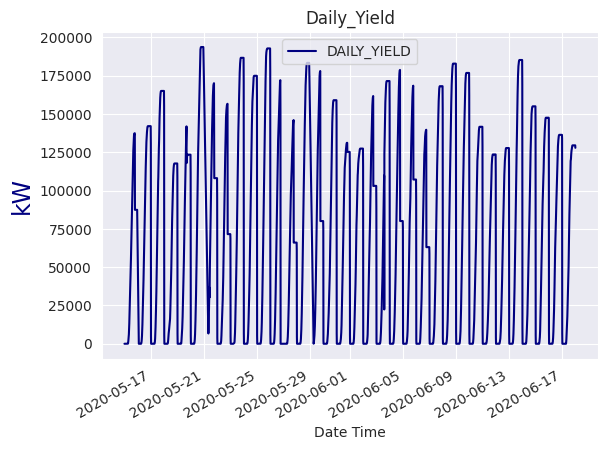

In [ ]:

# daily yield over the time

df_gen = gen_1.groupby('DATE_TIME').sum().reset_index()  # 
df_gen.plot(x='DATE_TIME', y='DAILY_YIELD', color='navy')
plt.title('Daily_Yield')  
plt.ylabel('kW', color='navy', fontsize=17)
plt.xlabel('Date Time')  
plt.show()

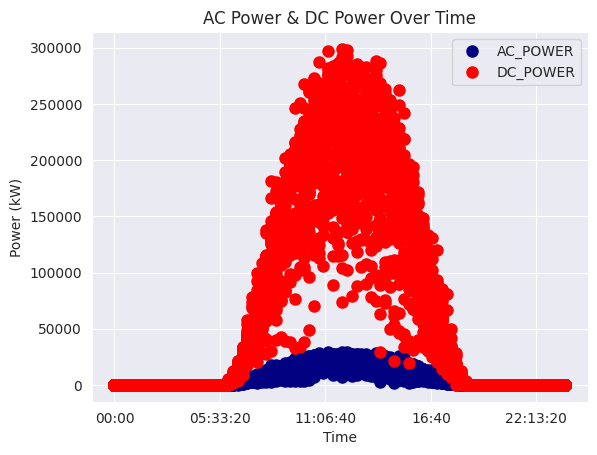

In [ ]:

#AC_power & DC_power over the time
# Create 'time' column from 'DATE_TIME'
df_gen['time'] = df_gen['DATE_TIME'].dt.time

# Set 'time' as index and drop 'DATE_TIME' column
df_gen.set_index('time', inplace=True)
df_gen.drop('DATE_TIME', axis=1, inplace=True)

# Plot the columns with markers
df_gen[['AC_POWER', 'DC_POWER']].plot(style='o', 
                                       color=['navy', 'red'],  # Assign colors to each column
                                       markersize=8)

# Add labels and title
plt.title('AC Power & DC Power Over Time')
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.legend()

# Show the plot
plt.show()

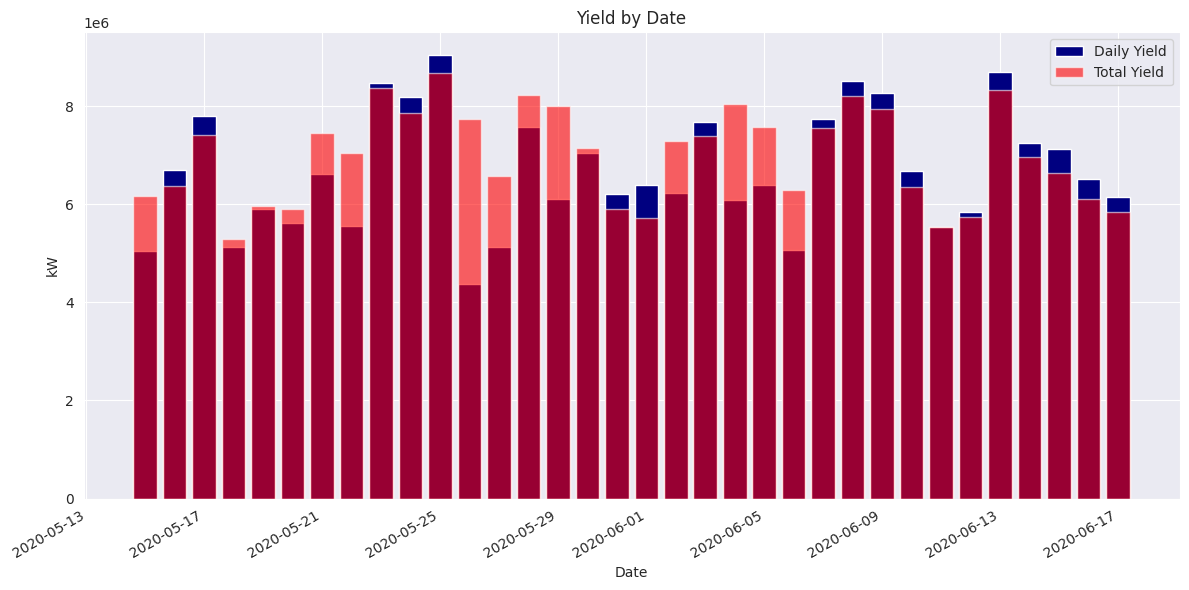

In [59]:
# STEP 1: First, ensure numerical columns are properly formatted (only needed once)
numerical_cols = ['DAILY_YIELD', 'DC_POWER', 'AC_POWER']  # Adjust column names to your actual column names
df_gen[numerical_cols] = df_gen[numerical_cols].apply(pd.to_numeric, errors='coerce')

# STEP 2: Correct aggregation of daily totals (replace column names as needed)
daily_total = df_gen.groupby('DATE')[['DAILY_YIELD', 'TOTAL_YIELD']].sum().reset_index()

# Create the final plot with proper date formatting
plt.figure(figsize=(12, 6))
plt.bar(daily_total['DATE'], daily_total['DAILY_YIELD'], 
        color='navy', 
        label='Daily Yield')

# Add another bar series for total yield (if needed)
plt.bar(daily_total['DATE'], daily_total['TOTAL_YIELD'], 
        color='red', alpha=0.6, 
        label='Total Yield')

# Formatting
plt.title('Yield by Date')
plt.xlabel('Date')
plt.ylabel('kW')
plt.xticks(rotation=45)
plt.legend()

# Properly display dates
plt.gcf().autofmt_xdate() # Auto-rotates dates correctly
plt.tight_layout()
plt.show()

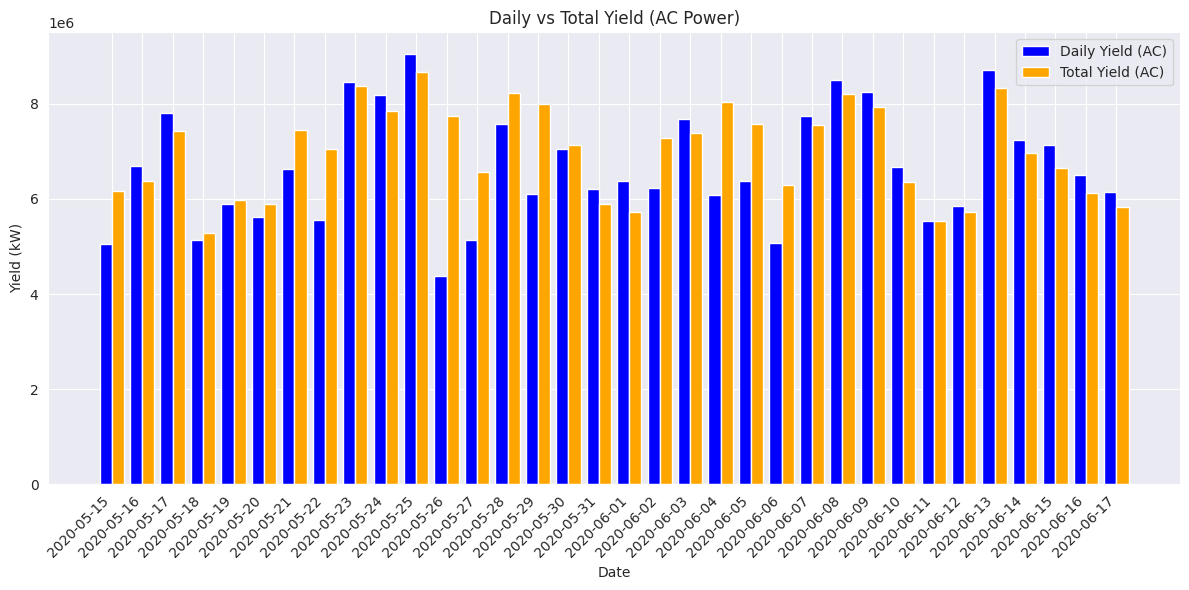

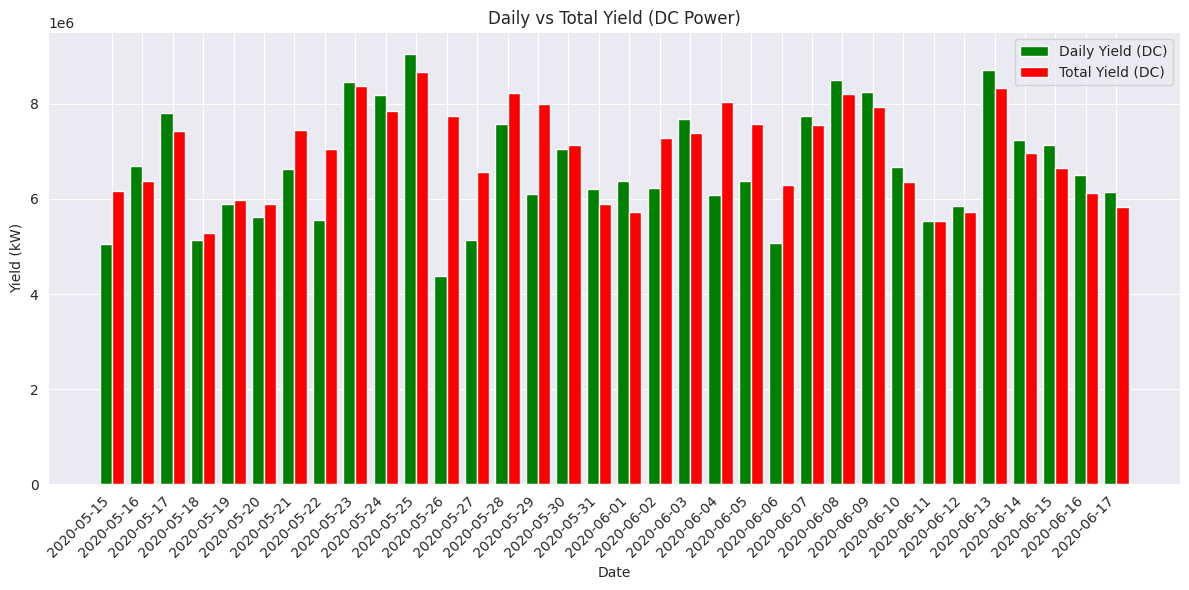

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data = df_gen.copy()

# Ensure columns are numeric
numeric_cols = ['AC_POWER', 'DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']
df_gen[numeric_cols] = df_gen[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert DATE_TIME to date format
df_gen['DATE'] = pd.to_datetime(df_gen['DATE_TIME']).dt.date

# Group by date to calculate daily sums
daily_total = df_gen.groupby('DATE', observed=True)[['DAILY_YIELD', 'TOTAL_YIELD', 'AC_POWER', 'DC_POWER']].sum().reset_index()

# Plot 1: Daily Yield vs Total Yield on AC Power
fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(len(daily_total['DATE']))
bar_width = 0.4

ax1.bar(x, daily_total['DAILY_YIELD'], width=bar_width, color='blue', label='Daily Yield (AC)')
ax1.bar(x + bar_width, daily_total['TOTAL_YIELD'], width=bar_width, color='orange', label='Total Yield (AC)')

# Formatting x-axis
ax1.set_xticks(x + bar_width / 2)
ax1.set_xticklabels(daily_total['DATE'], rotation=45, ha='right')

ax1.set_xlabel('Date')
ax1.set_ylabel('Yield (kW)')
ax1.set_title('Daily vs Total Yield (AC Power)')
ax1.legend()

plt.tight_layout()
plt.show()

# Plot 2: Daily Yield vs Total Yield on DC Power
fig, ax2 = plt.subplots(figsize=(12, 6))

ax2.bar(x, daily_total['DAILY_YIELD'], width=bar_width, color='green', label='Daily Yield (DC)')
ax2.bar(x + bar_width, daily_total['TOTAL_YIELD'], width=bar_width, color='red', label='Total Yield (DC)')

# Formatting x-axis
ax2.set_xticks(x + bar_width / 2)
ax2.set_xticklabels(daily_total['DATE'], rotation=45, ha='right')

ax2.set_xlabel('Date')
ax2.set_ylabel('Yield (kW)')
ax2.set_title('Daily vs Total Yield (DC Power)')
ax2.legend()

plt.tight_layout()
plt.show()